In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Diamonds%20Prices/Diamonds%20Prices2022.csv")

In [4]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
sns.set_style('darkgrid')

In [6]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


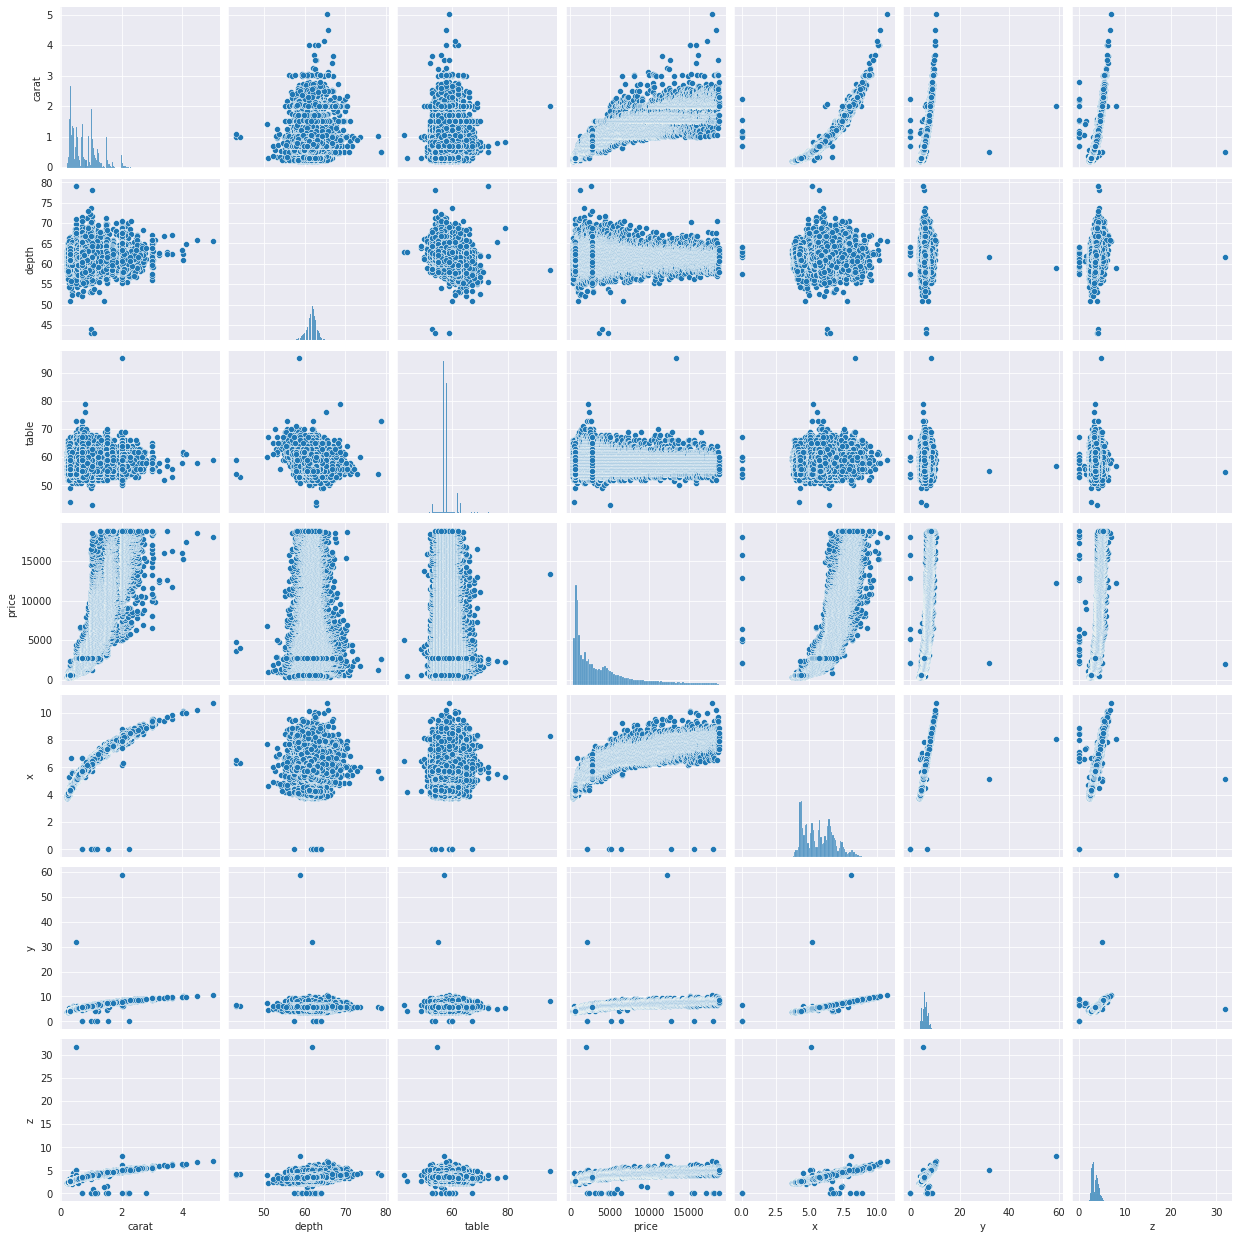

In [7]:
sns.pairplot(kind='scatter',data=df)

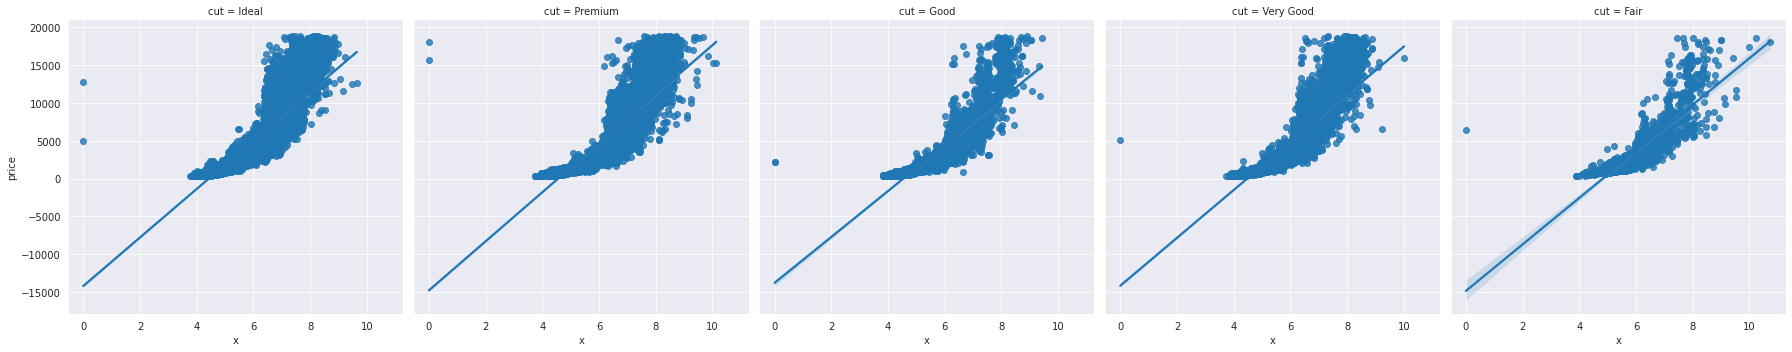

In [8]:
sns.lmplot(x='x',y='price',data=df,col='cut')

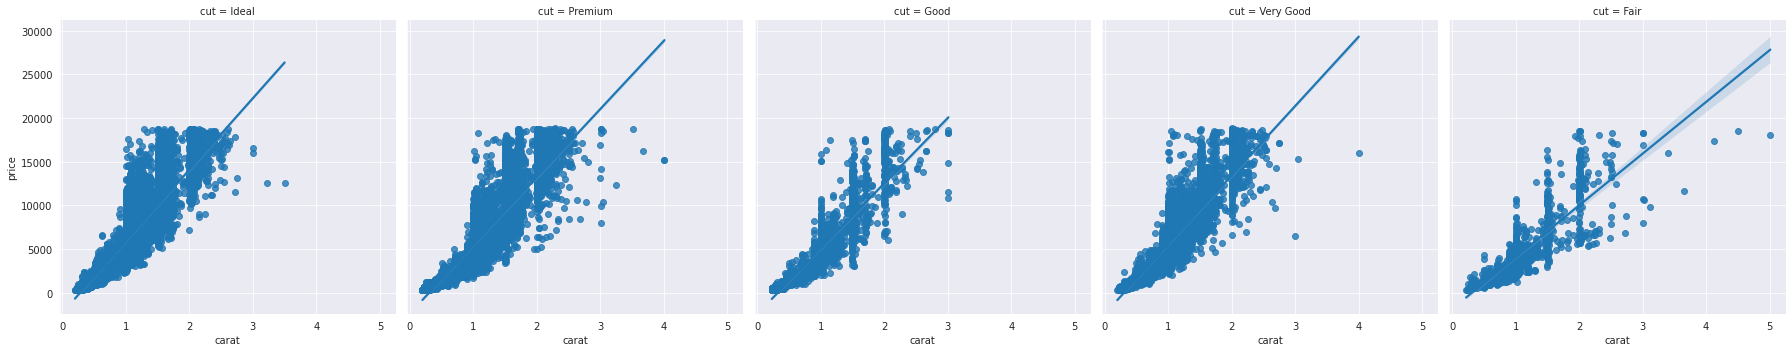

In [9]:
sns.lmplot(x='carat',y='price',data=df,col='cut')

<Figure size 864x720 with 0 Axes>

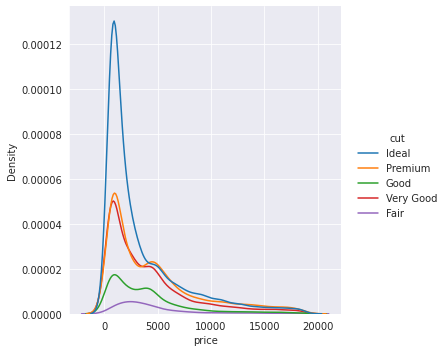

In [10]:
plt.figure(figsize=(12,10))
sns.displot(data=df, x="price", kind="kde",hue='cut')

<AxesSubplot:xlabel='color', ylabel='price'>

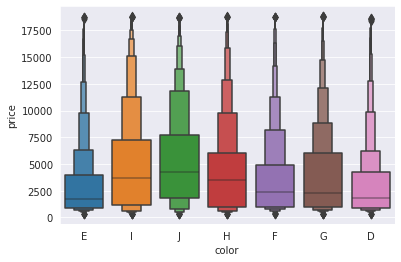

In [11]:
sns.boxenplot(x="color", y="price", data=df)

<AxesSubplot:xlabel='clarity', ylabel='price'>

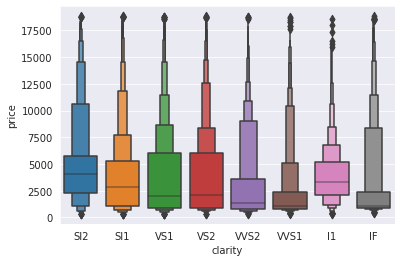

In [12]:
sns.boxenplot(x="clarity", y="price", data=df)

<Figure size 864x720 with 0 Axes>

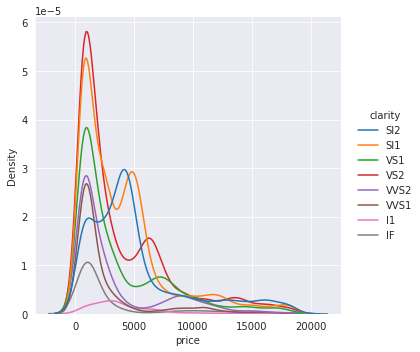

In [13]:
plt.figure(figsize=(12,10))
sns.displot(data=df, x="price", kind="kde",hue='clarity')

In [14]:
top=df.sort_values('price',ascending=False).head(10)
top

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27743,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
27740,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21


In [15]:
low=df.sort_values('price',ascending=True).head(10)
low

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [16]:
cut_dummy=pd.get_dummies(df['cut'],drop_first=True)
color_dummy=pd.get_dummies(df['color'],drop_first=True)
clarity_dummy=pd.get_dummies(df['clarity'],drop_first=True)
X=pd.concat([cut_dummy,color_dummy,clarity_dummy,df['carat'],df['depth'],df['table'],df['x'],df['y'],df['z']],axis=1)
y=df['price']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

ElasticNet(random_state=0)

In [19]:
print(regr.coef_)

[ -37.88250717   45.16565425   41.20746055    1.66396081   10.58682586
   28.97607939   56.6685509   -26.69381549  -38.09714589  -69.5202628
   56.45694824 -122.64364392 -180.80780726   76.93354792   54.06089747
   75.86432882  114.32637302  652.3690576   -13.80737084  -20.87172806
 1073.01477339 1039.34174458  626.32166329]


In [20]:
print(regr.intercept_)

-8878.276860106656


In [21]:
y_pred=regr.predict(X_test)
pd.DataFrame(regr.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Good,-37.882507
Ideal,45.165654
Premium,41.207461
Very Good,1.663961
E,10.586826
F,28.976079
G,56.668551
H,-26.693815
I,-38.097146
J,-69.520263


<AxesSubplot:ylabel='price'>

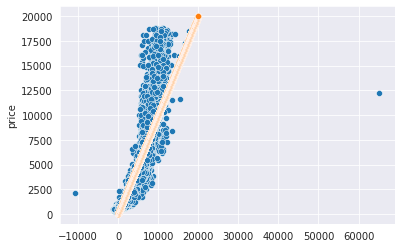

In [22]:
sns.scatterplot(x=y_pred,y=y_test)
a=np.arange(1,20000)
sns.scatterplot(x=a,y=a)

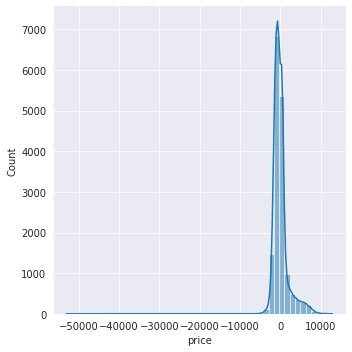

In [23]:
sns.displot(y_test-y_pred,kde=True,bins=50)

In [24]:
d={'predicted':y_pred,'actual':y_test}
pred_data=pd.DataFrame(data=d)
pred_data['Error percent']=abs(pred_data['predicted']-pred_data['actual'])/pred_data['actual']*100
pred_data['Error percent'].describe()

count    16183.000000
mean        45.869305
std         40.998632
min          0.010409
25%         19.303397
50%         36.638143
75%         60.501522
max        604.327006
Name: Error percent, dtype: float64

In [25]:
from sklearn import metrics
metrics.explained_variance_score(y_test,y_pred)

0.7782661429199127

In [26]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred1=lm.predict(X_test)
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Good,544.541814
Ideal,803.850540
Premium,747.435553
Very Good,688.934603
E,-210.511512
F,-283.940825
G,-487.420227
H,-978.533700
I,-1495.978772
J,-2388.688171


<AxesSubplot:ylabel='price'>

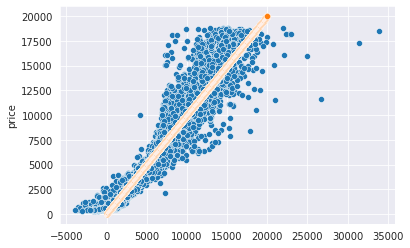

In [27]:
sns.scatterplot(x=y_pred1,y=y_test)
a=np.arange(1,20000)
sns.scatterplot(x=a,y=a)

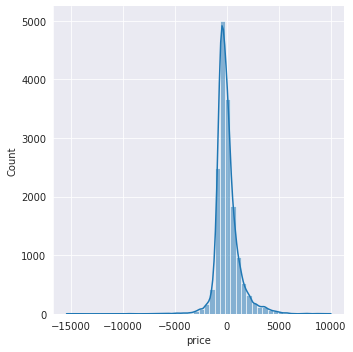

In [28]:
sns.displot(y_test-y_pred1,kde=True,bins=50)

In [29]:
d={'predicted':y_pred1,'actual':y_test}
pred_data1=pd.DataFrame(data=d)
pred_data1['Error percent']=abs(pred_data1['predicted']-pred_data1['actual'])/pred_data1['actual']*100
pred_data1['Error percent'].describe()

count    16183.000000
mean        39.269439
std         66.877481
min          0.001626
25%          9.073277
50%         20.524806
75%         41.012269
max       1095.297136
Name: Error percent, dtype: float64

In [30]:
metrics.explained_variance_score(y_test,y_pred1)

0.9195508841577341

<AxesSubplot:ylabel='price'>

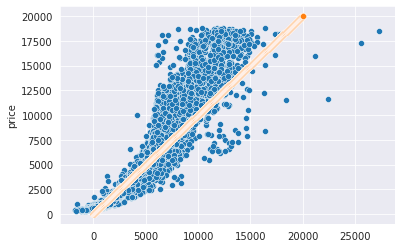

In [31]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr2 = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2,kernel='linear'))
regr2.fit(X_train, y_train)
y_pred2=regr2.predict(X_test)
sns.scatterplot(x=y_pred2,y=y_test)
a=np.arange(1,20000)
sns.scatterplot(x=a,y=a)

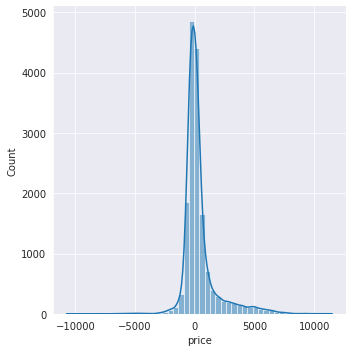

In [32]:
sns.displot(y_test-y_pred2,kde=True,bins=50)

In [33]:
d={'predicted':y_pred2,'actual':y_test}
pred_data2=pd.DataFrame(data=d)
pred_data2['Error percent']=abs(pred_data2['predicted']-pred_data2['actual'])/pred_data2['actual']*100
pred_data2['Error percent'].describe()

count    16183.000000
mean        28.009509
std         38.991866
min          0.000622
25%          8.182800
50%         18.219074
75%         31.768264
max        575.075715
Name: Error percent, dtype: float64

In [34]:
metrics.explained_variance_score(y_test,y_pred2)

0.8734115861451306

(-5000.0, 40000.0)

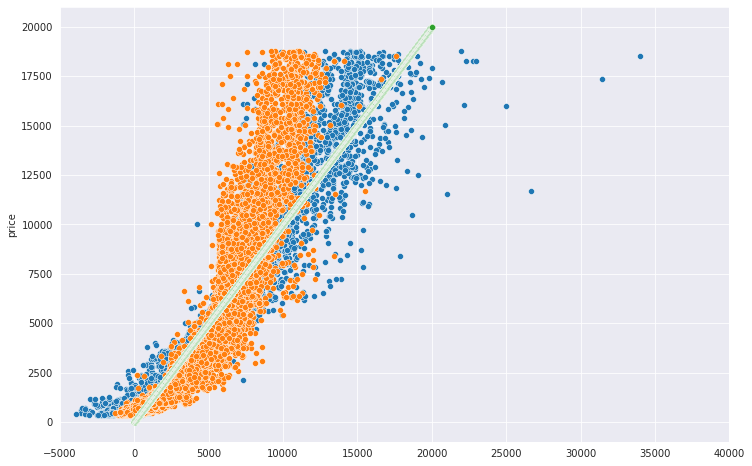

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_pred1,y=y_test)
sns.scatterplot(x=y_pred,y=y_test)
a=np.arange(1,20000)
sns.scatterplot(x=a,y=a)
plt.xlim([-5000,40000])

(-5000.0, 40000.0)

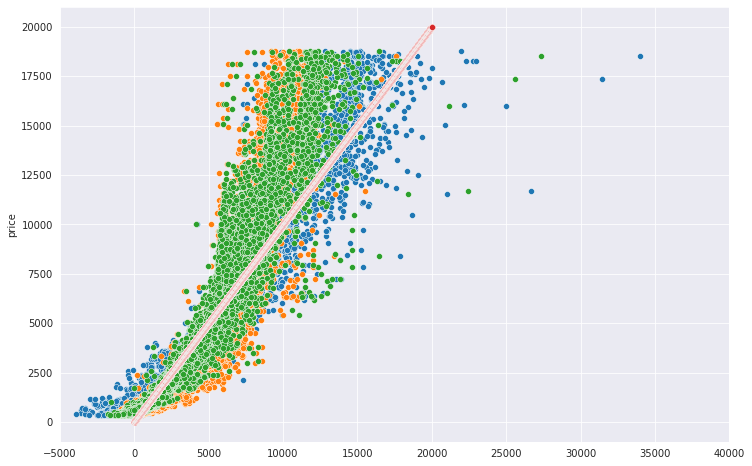

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_pred1,y=y_test)
sns.scatterplot(x=y_pred,y=y_test)
sns.scatterplot(x=y_pred2,y=y_test)
a=np.arange(1,20000)
sns.scatterplot(x=a,y=a)
plt.xlim([-5000,40000])